In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#load the amazon fruits data set

In [ ]:
im_shape = (250,250)

TRAINING_DIR = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train'
TEST_DIR = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/test'

seed = 10

BATCH_SIZE = 16

#data generate by validation split 0.2

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#class mode categorical

In [ ]:

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


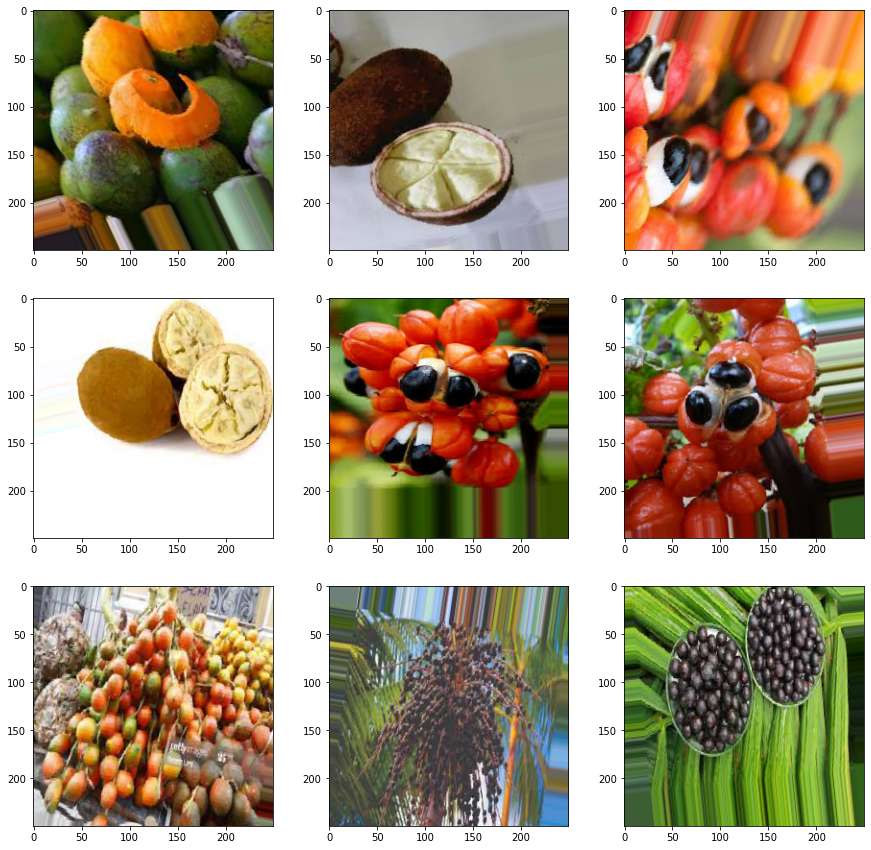

In [ ]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


#sequential model by taking activation as relu

In [ ]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 20)      560       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 20)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 40)      7240      
                                                                 
 flatten_1 (Flatten)         (None, 595360)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               59536100  
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                      

#train the model by 80 epochs

In [ ]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
4/4 [==============================] - ETA: 0s - loss: 24.8445 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 32.61633, saving model to model.h5
4/4 [==============================] - 13s 3s/step - loss: 24.8445 - accuracy: 0.2500 - val_loss: 32.6163 - val_accuracy: 0.1875
Epoch 2/80
4/4 [==============================] - ETA: 0s - loss: 29.1050 - accuracy: 0.2344
Epoch 2: val_loss improved from 32.61633 to 13.04887, saving model to model.h5
4/4 [==============================] - 12s 3s/step - loss: 29.1050 - accuracy: 0.2344 - val_loss: 13.0489 - val_accuracy: 0.1875
Epoch 3/80
4/4 [==============================] - ETA: 0s - loss: 11.3071 - accuracy: 0.1429
Epoch 3: val_loss improved from 13.04887 to 1.52703, saving model to model.h5
4/4 [==============================] - 9s 2s/step - loss: 11.3071 - accuracy: 0.1429 - val_loss: 1.5270 - val_accuracy: 0.4375
Epoch 4/80
4/4 [==============================] - ETA: 0s - loss: 1.9566 - accuracy: 0.3438
Epoch 4: val_

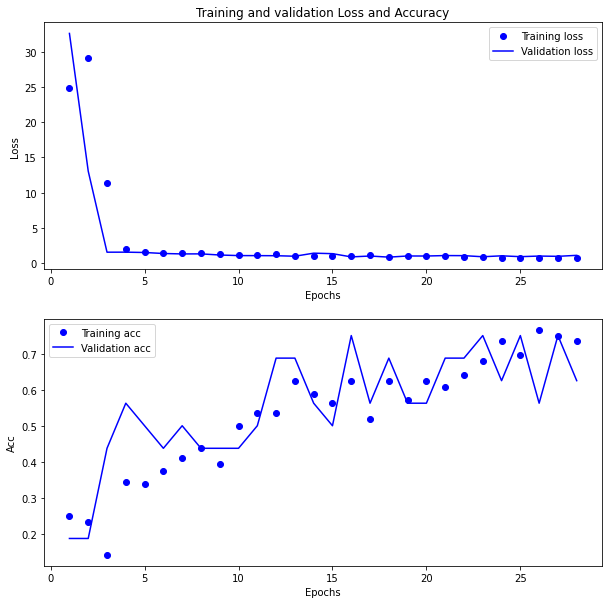

In [ ]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

#accuracy

In [ ]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Val loss: 0.9665515422821045
Val accuracy: 0.6111111044883728


In [ ]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test loss: 1.088226556777954
Test accuracy: 0.5


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#confusion matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Classification Report
              precision    recall  f1-score   support

        acai       0.62      1.00      0.77         5
     cupuacu       1.00      0.20      0.33         5
    graviola       0.43      0.60      0.50         5
     guarana       0.45      1.00      0.62         5
     pupunha       0.50      0.20      0.29         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.42        30
weighted avg       0.50      0.50      0.42        30



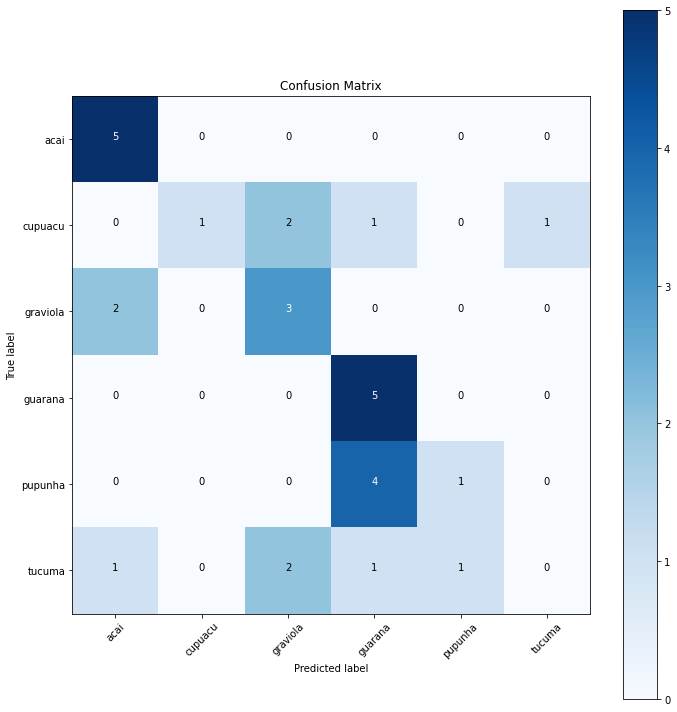

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

#model with (image shape 150,150), batch size 10, validation split 0.4

In [ ]:
im_shape = (150,150)

TRAINING_DIR = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train'
TEST_DIR = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/test'

seed = 20

BATCH_SIZE =10

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.4)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.4)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.4,
        rotation_range=20,
        width_shift_range=0.4,
        height_shift_range=0.4,
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.4)

In [ ]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 54 images belonging to 6 classes.
Found 36 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


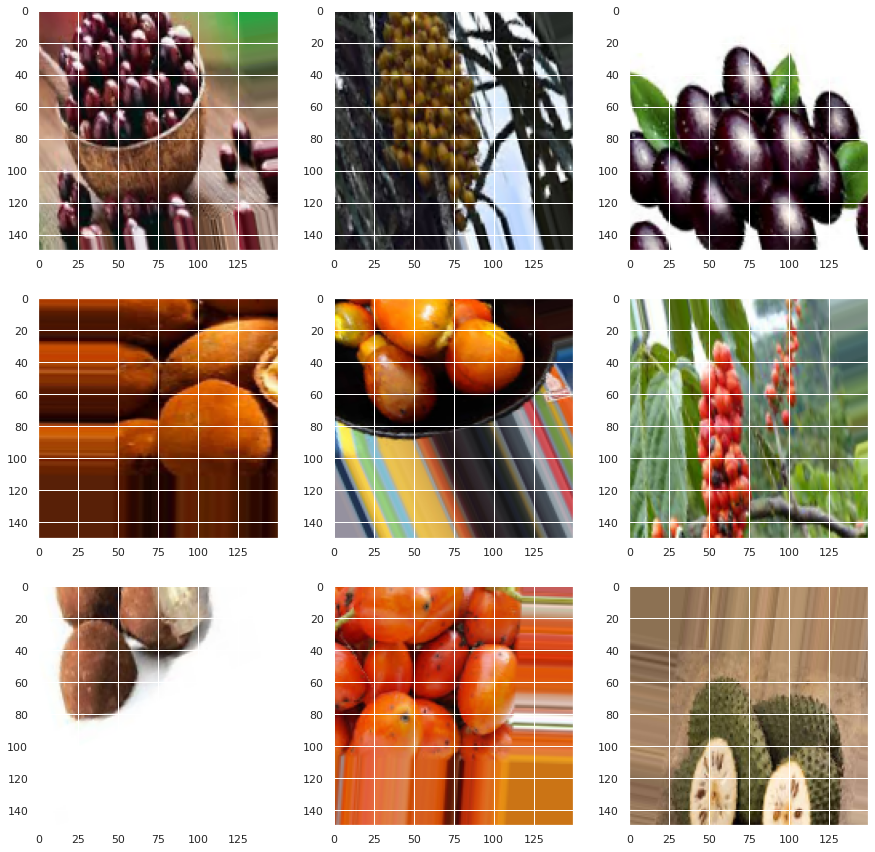

In [ ]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


#sequential model by activation as sigmoid

In [ ]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='sigmoid',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='sigmoid'))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 20)      560       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 20)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 40)        7240      
                                                                 
 flatten_6 (Flatten)         (None, 207360)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               20736100  
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                      

In [ ]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
5/5 [==============================] - ETA: 0s - loss: 2.9713 - accuracy: 0.2045
Epoch 1: val_loss improved from inf to 2.58831, saving model to model.h5
5/5 [==============================] - 5s 928ms/step - loss: 2.9713 - accuracy: 0.2045 - val_loss: 2.5883 - val_accuracy: 0.2000
Epoch 2/80
5/5 [==============================] - ETA: 0s - loss: 2.9896 - accuracy: 0.1818
Epoch 2: val_loss improved from 2.58831 to 2.49972, saving model to model.h5
5/5 [==============================] - 4s 909ms/step - loss: 2.9896 - accuracy: 0.1818 - val_loss: 2.4997 - val_accuracy: 0.2000
Epoch 3/80
5/5 [==============================] - ETA: 0s - loss: 3.0970 - accuracy: 0.0909
Epoch 3: val_loss improved from 2.49972 to 2.41316, saving model to model.h5
5/5 [==============================] - 3s 718ms/step - loss: 3.0970 - accuracy: 0.0909 - val_loss: 2.4132 - val_accuracy: 0.2000
Epoch 4/80
5/5 [==============================] - ETA: 0s - loss: 2.5134 - accuracy: 0.2727
Epoch 4: val_loss 

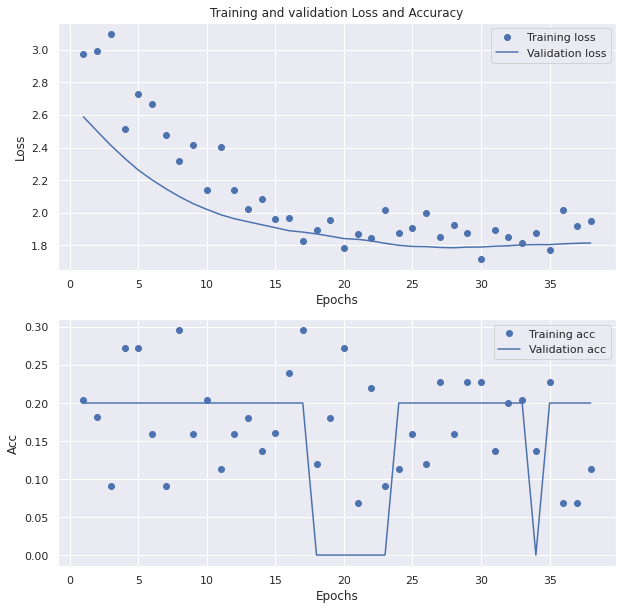

In [ ]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

#accuracy

In [ ]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Val loss: 1.792784571647644
Val accuracy: 0.1666666716337204


In [ ]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test loss: 1.792784571647644
Test accuracy: 0.1666666716337204


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#confusion matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Classification Report
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         5
     cupuacu       0.00      0.00      0.00         5
    graviola       0.00      0.00      0.00         5
     guarana       0.17      1.00      0.29         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.17        30
   macro avg       0.03      0.17      0.05        30
weighted avg       0.03      0.17      0.05        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


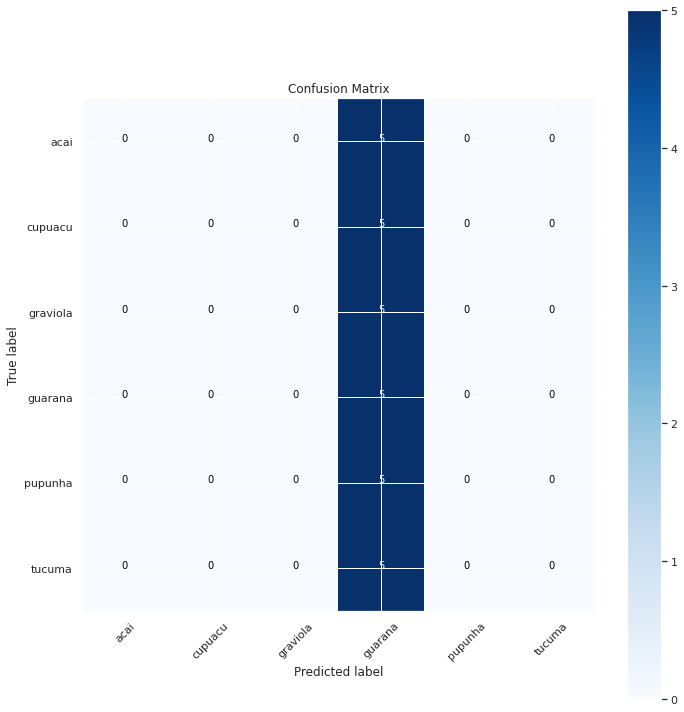

In [ ]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

#using transfer learning technique VGG16

In [ ]:
#import libraries
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#image size[224,224]

In [ ]:
#resizing images to 224
IMAGE_SIZE = [224, 224]

In [ ]:
#assigning the train, validation directories of the dataset
train_path = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train'
validation_path = '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/test'


In [ ]:
import seaborn as sns


#representing the fruits data set using barplot

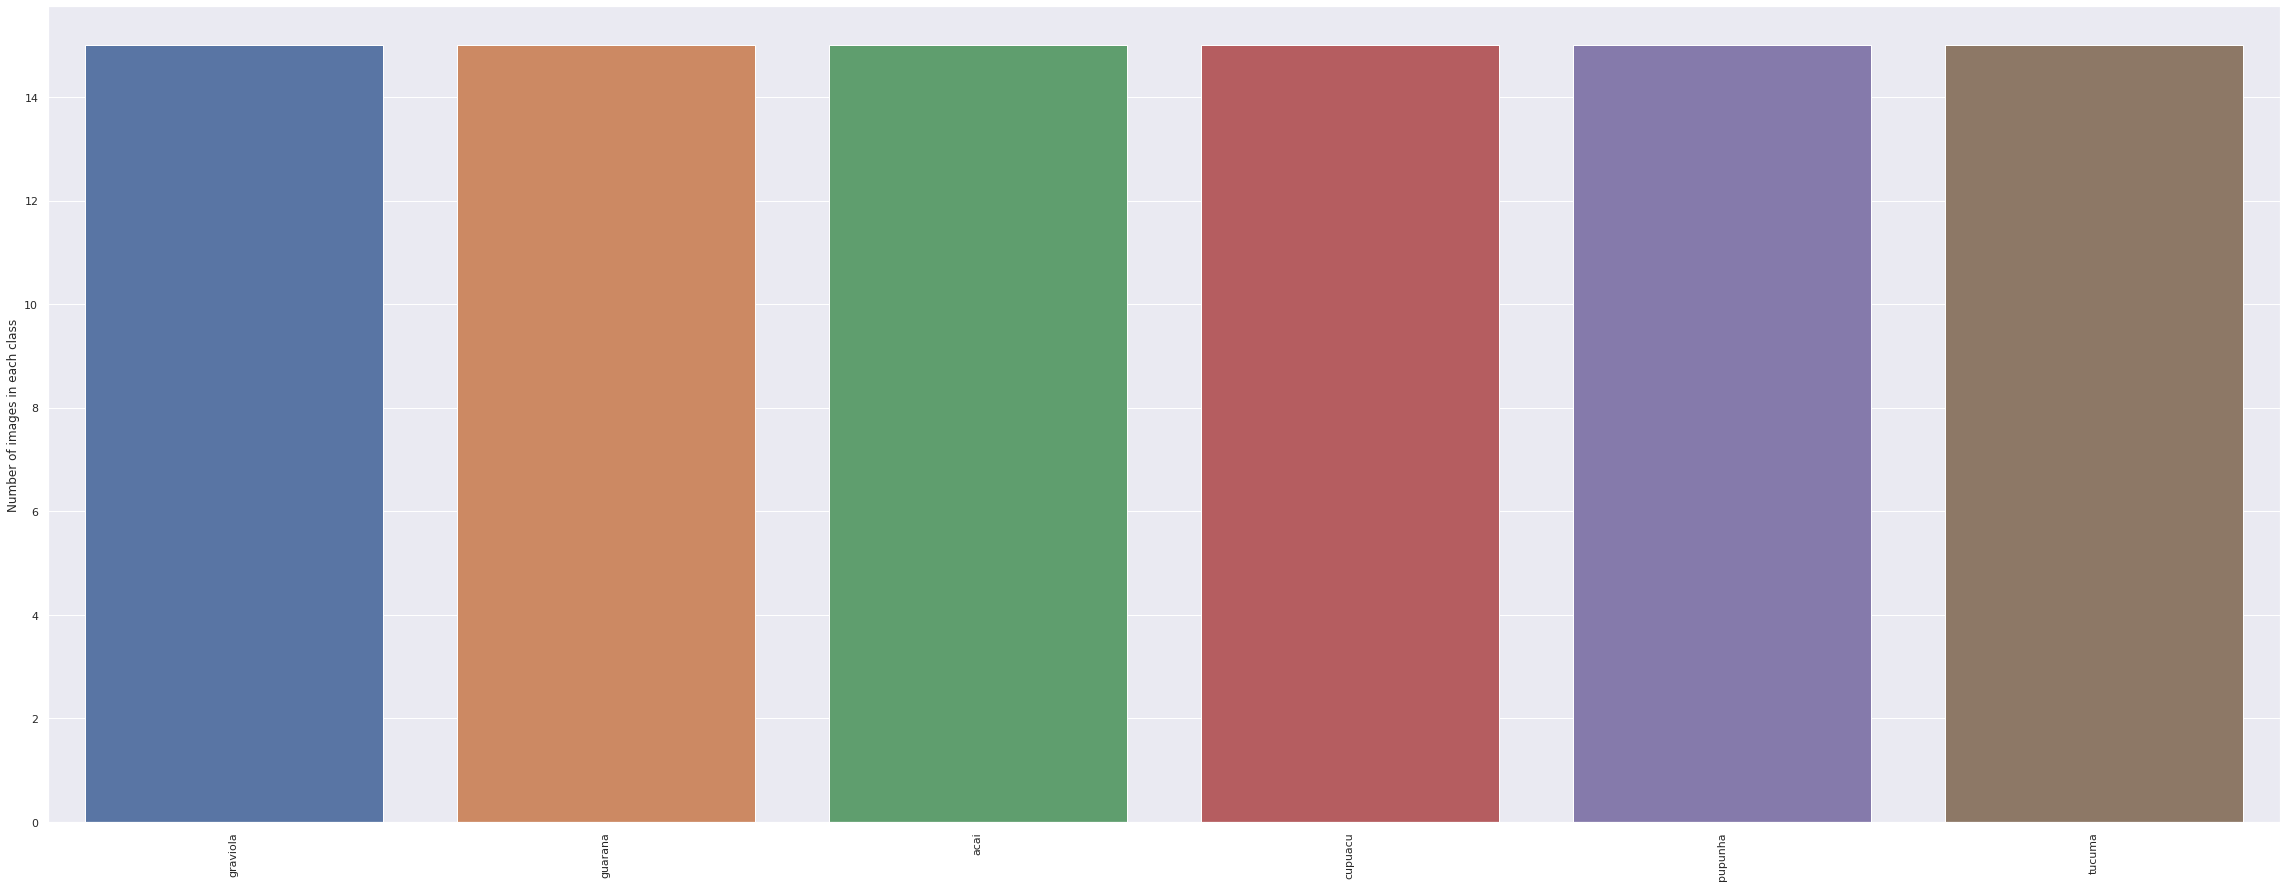

In [ ]:
sns.set(rc={'figure.figsize':(40,15)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.xticks(rotation=90)
plt.show()

In [ ]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob(train_path + '/*')
folders

['/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/graviola',
 '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/guarana',
 '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/acai',
 '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/cupuacu',
 '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/pupunha',
 '/content/drive/MyDrive/amazon fruits data set/amazon fruits data set/ds_frutas_am/train/tucuma']

In [ ]:
flattened_vgg = Flatten()(vgg.output)

In [ ]:
prediction  =  Dense(len(folders), activation='softmax')(flattened_vgg )

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)

#model structure
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

#using data augmentation technique to build a more compact

In [ ]:
#Using Data Augmentation technigues to build a more compact 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=20,
  validation_steps=5
)

Epoch 1/5
 3/20 [===>..........................] - ETA: 4:19 - loss: 0.8462 - accuracy: 0.6778

20/20 [==============================] - 66s 2s/step - loss: 0.8462 - accuracy: 0.6778 - val_loss: 1.4381 - val_accuracy: 0.4667


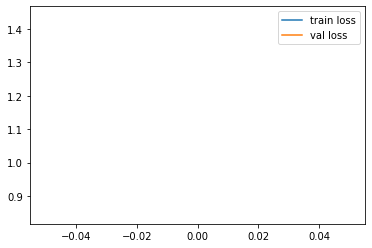

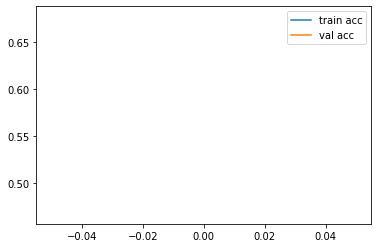

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('fruits_model.h5')